In [6]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [11]:
df_0 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_-1.csv', delimiter=';')
df_1 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_0.csv', delimiter=';')
df_2 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_1.csv', delimiter=';')

In [12]:
df_0
df_1
df_2

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.0
1,1,0,PICNIC_BASKET1,58705,12,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252,12,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
4,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1,999900,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0
79996,1,999900,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
79997,1,999900,SQUID_INK,1799,20,NaN,NaN,NaN,NaN,1802,20,NaN,NaN,NaN,NaN,1800.5,0.0
79998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0


In [42]:
croissant_df = df_1.loc[df_1['product']=='CROISSANTS'].copy()
jams_df = df_1.loc[df_1['product']=='JAMS'].copy()
djembes_df = df_1.loc[df_1['product']=='DJEMBES'].copy()
picnic1_df = df_1.loc[df_1['product']=='PICNIC_BASKET1'].copy()
picnic2_df = df_1.loc[df_1['product']=='PICNIC_BASKET2'].copy()

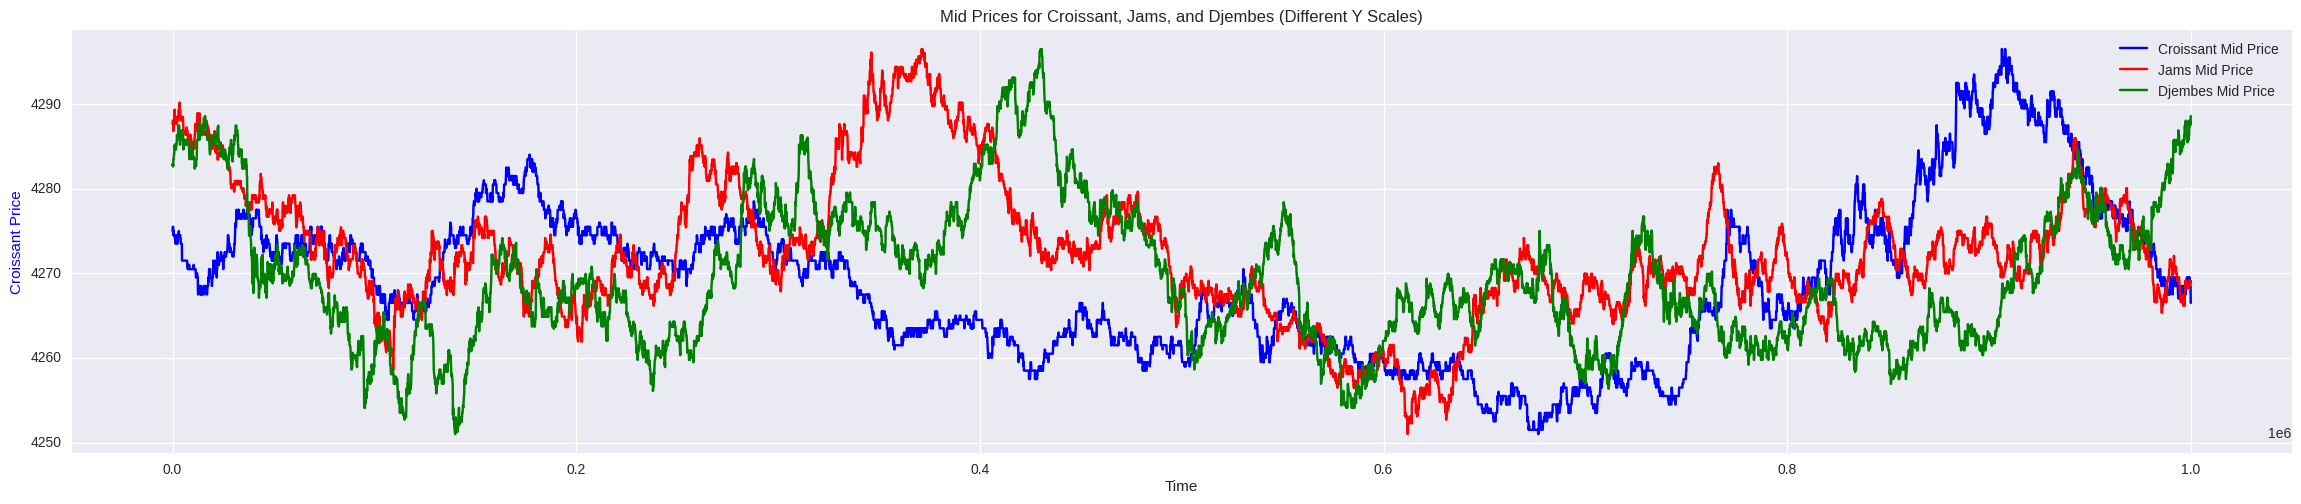

In [43]:
###################################################### DAY 1 ##########################################3333
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Define a helper to make spines invisible for parasite axes.
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# Create a host subplot.
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=2.9)

# Create two parasite y-axes.
par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.
par2.spines["right"].set_position(("axes", 1.5))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

# Plot each series on its own axis.
p1, = host.plot(croissant_df['timestamp'], croissant_df['mid_price'], label='Croissant Mid Price', color='blue')
p2, = par1.plot(jams_df['timestamp'], jams_df['mid_price'], label='Jams Mid Price', color='red')
p3, = par2.plot(djembes_df['timestamp'], djembes_df['mid_price'], label='Djembes Mid Price', color='green')

# Set axis labels
host.set_xlabel("Time")
host.set_ylabel("Croissant Price")
par1.set_ylabel("Jams Price")
par2.set_ylabel("Djembes Price")

# Adjust colors for y-axis tick labels
host.yaxis.label.set_color('blue')
par1.yaxis.label.set_color('red')
par2.yaxis.label.set_color('green')
host.tick_params(axis='y', colors='blue')
par1.tick_params(axis='y', colors='red')
par2.tick_params(axis='y', colors='green')

plt.title("Mid Prices for Croissant, Jams, and Djembes (Different Y Scales)")

# Add grid and legend. For the legend, combine all lines.
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines])

plt.show()

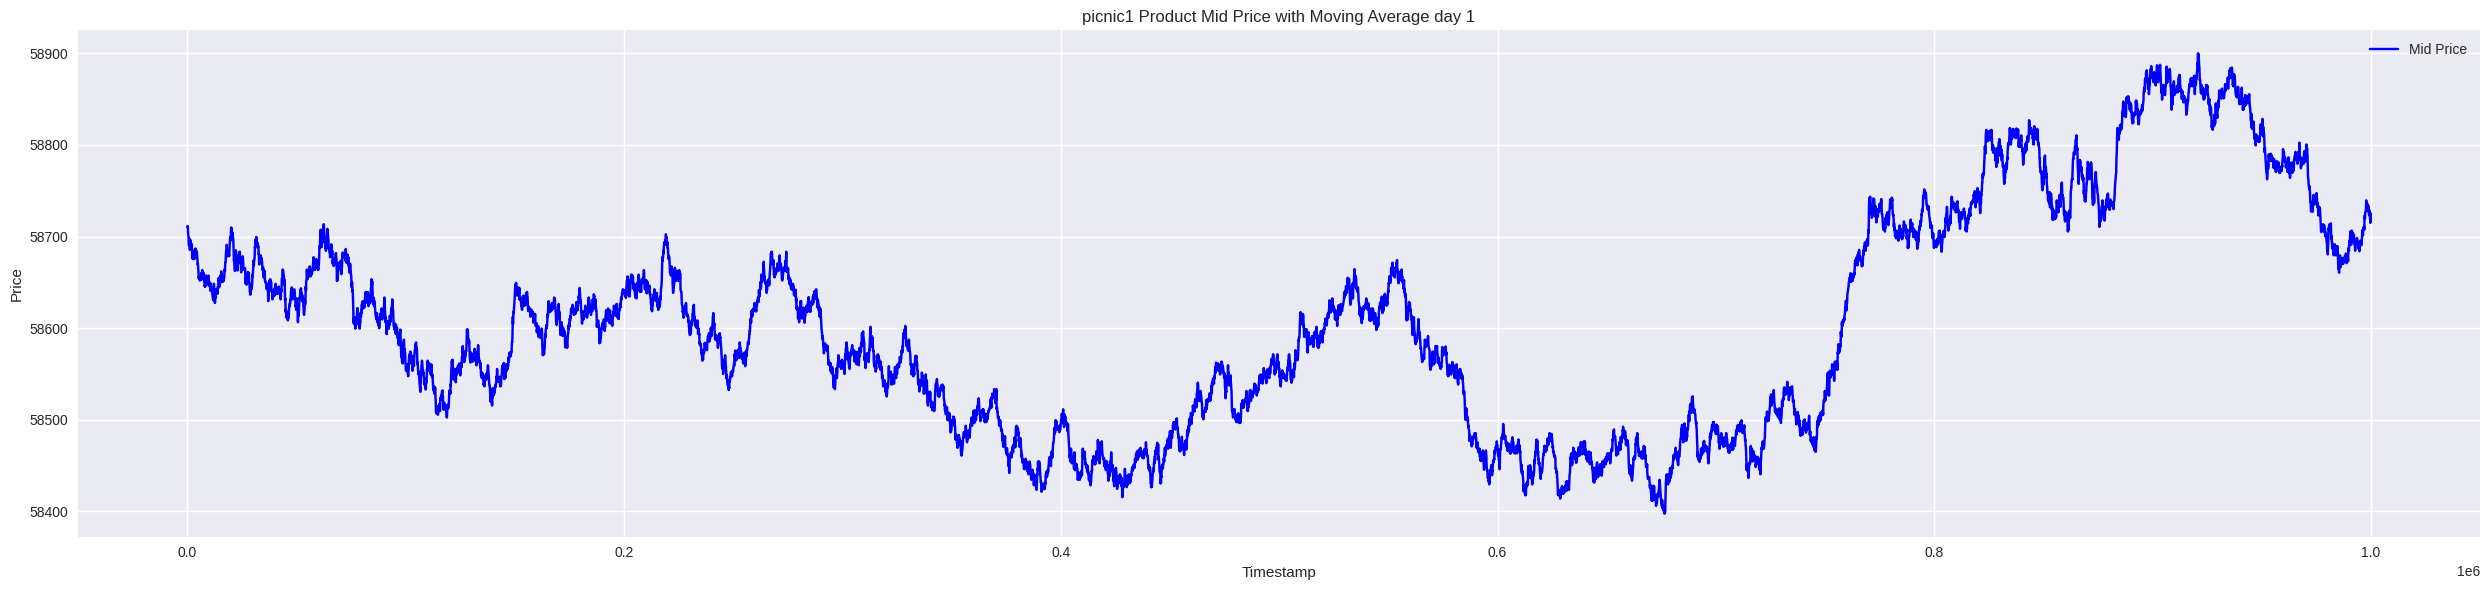

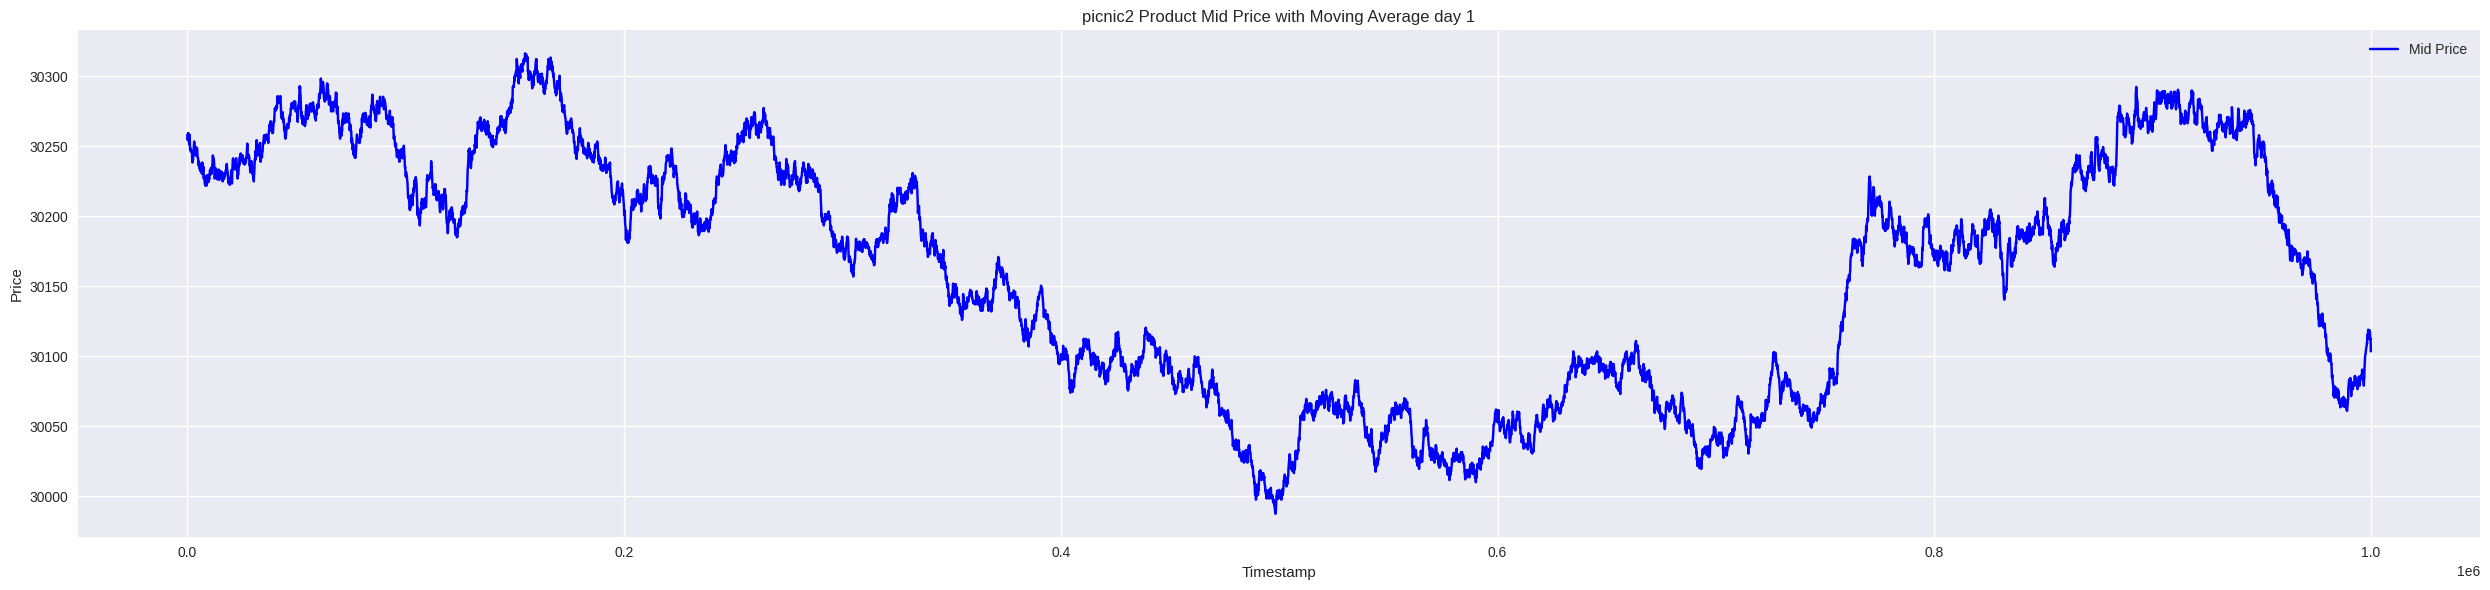

In [48]:
plt.figure(figsize=(25, 6))
plt.plot(picnic1_df['timestamp'], picnic1_df['mid_price'], label="Mid Price", linestyle='-', color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("picnic1 Product Mid Price with Moving Average day 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(picnic2_df['timestamp'], picnic2_df['mid_price'], label="Mid Price", linestyle='-', color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("picnic2 Product Mid Price with Moving Average day 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitted Coefficients (NumPy least squares):
Intercept:  21070.81723225288
Coefficient for CROISSANTS:  10.985405128943137
Coefficient for DJEMBES:  -0.3863885753766123
Coefficient for JAMS:  -0.642382343406493


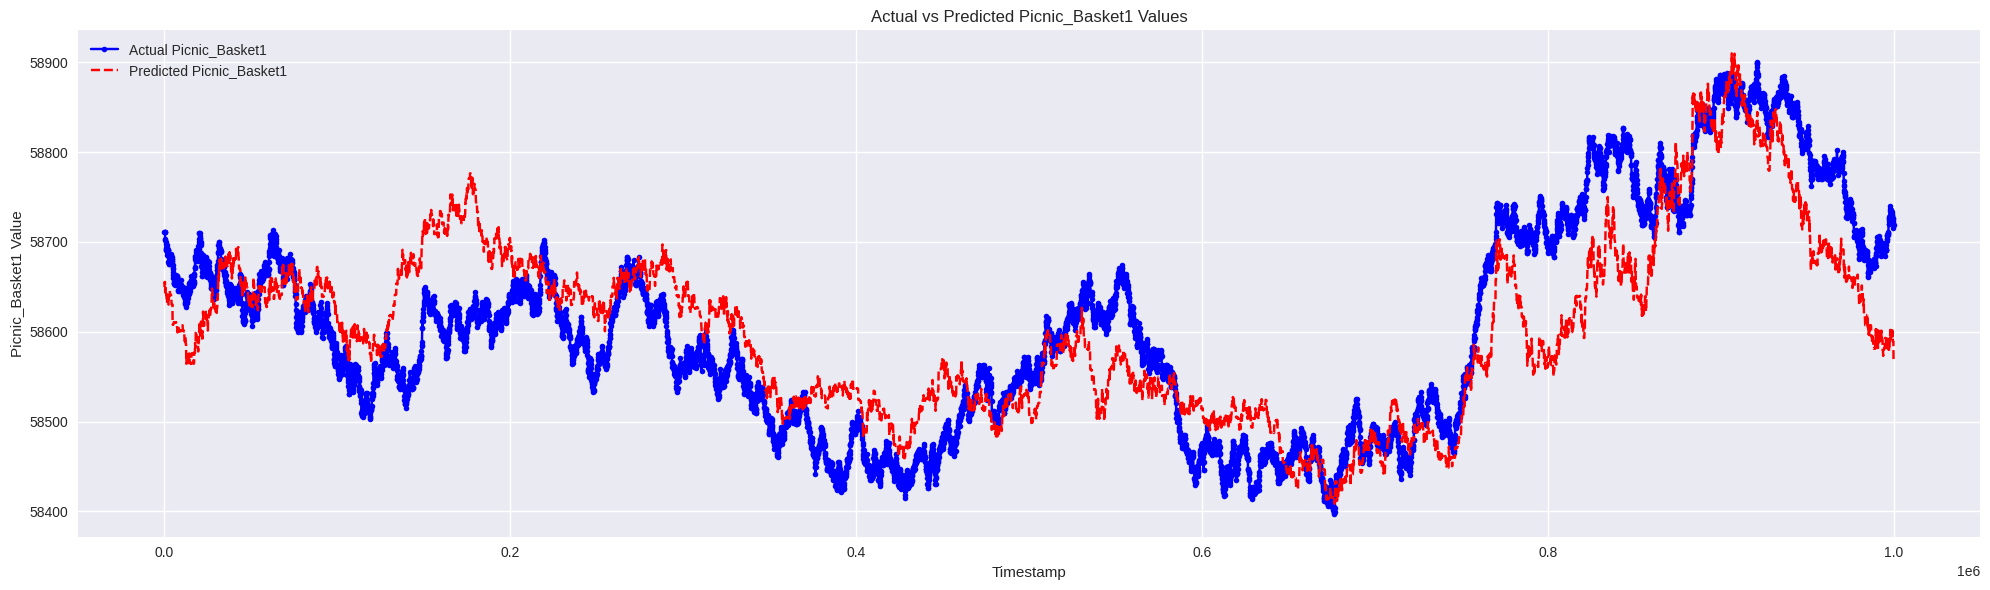

In [55]:
croissant_df = df_1.loc[df_1['product']=='CROISSANTS'].copy()
jams_df = df_1.loc[df_1['product']=='JAMS'].copy()
djembes_df = df_1.loc[df_1['product']=='DJEMBES'].copy()
picnic1_df = df_1.loc[df_1['product']=='PICNIC_BASKET1'].copy()
picnic2_df = df_1.loc[df_1['product']=='PICNIC_BASKET2'].copy()

croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
picnic1_df = picnic1_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})

# Merge data on the timestamp (use inner join so only common timestamps are included)
merged_df = croissant_df.merge(jams_df, on='timestamp')\
                        .merge(djembes_df, on='timestamp')\
                        .merge(picnic1_df, on='timestamp')

# Drop any rows with missing data if necessary
merged_df = merged_df.dropna()

# Extract dependent variable (PICNIC_BASKET1 value) and independent variables.
y = merged_df['picnic1'].values
X = merged_df[['croissant', 'djembes', 'jams']].values

# Add a column of ones to X to fit an intercept term.
X_intercept = np.column_stack([np.ones(X.shape[0]), X])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict Picnic_Basket1 values
y_pred = model.predict(X)
# Use NumPy's least squares solver
coeffs, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=None)

print("Fitted Coefficients (NumPy least squares):")
print("Intercept: ", coeffs[0])
print("Coefficient for CROISSANTS: ", coeffs[1])
print("Coefficient for DJEMBES: ", coeffs[2])
print("Coefficient for JAMS: ", coeffs[3])

plt.figure(figsize=(20, 6))
plt.plot(merged_df['timestamp'], y, label='Actual Picnic_Basket1', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(merged_df['timestamp'], y_pred, label='Predicted Picnic_Basket1', color='red', marker='x', linestyle='--', markersize=4)
plt.xlabel("Timestamp")
plt.ylabel("Picnic_Basket1 Value")
plt.title("Actual vs Predicted Picnic_Basket1 Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

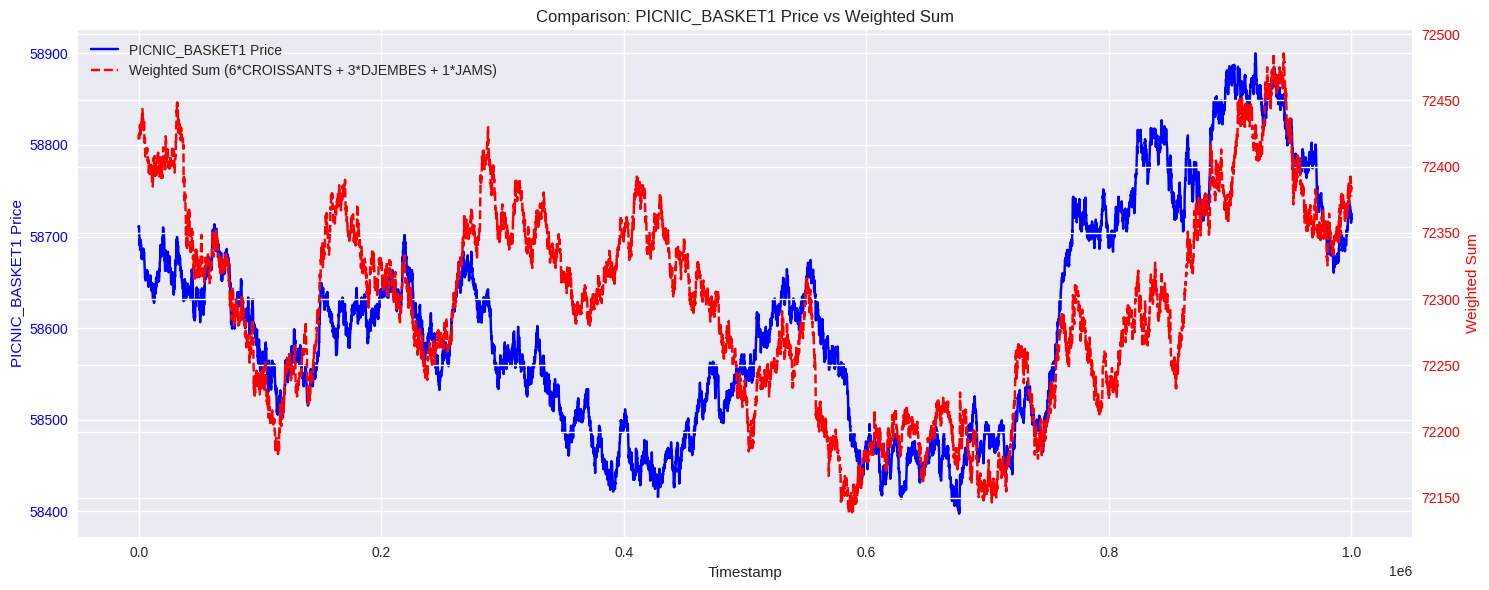

In [78]:
import matplotlib.pyplot as plt

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the PICNIC_BASKET1 series on the first y-axis
ax1.plot(merged_df['timestamp'], merged_df['picnic1'], label='PICNIC_BASKET1 Price', marker='x', linestyle='-', color='blue')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("PICNIC_BASKET1 Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the weighted series on the second y-axis
ax2.plot(merged_df['timestamp'], merged_df['weighted'], label='Weighted Sum (6*CROISSANTS + 3*DJEMBES + 1*JAMS)', marker='x', linestyle='--', color='red')
ax2.set_ylabel("Weighted Sum", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optionally, add a title and grid, and combine legends:
plt.title("Comparison: PICNIC_BASKET1 Price vs Weighted Sum")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax1.grid(True)
fig.tight_layout()
plt.show()

   timestamp  picnic1_z  weighted_z
0          0   0.895479    1.656820
1        100   0.895479    1.676789
2        200   0.903927    1.703414
3        300   0.895479    1.676789
4        400   0.836347    1.643507


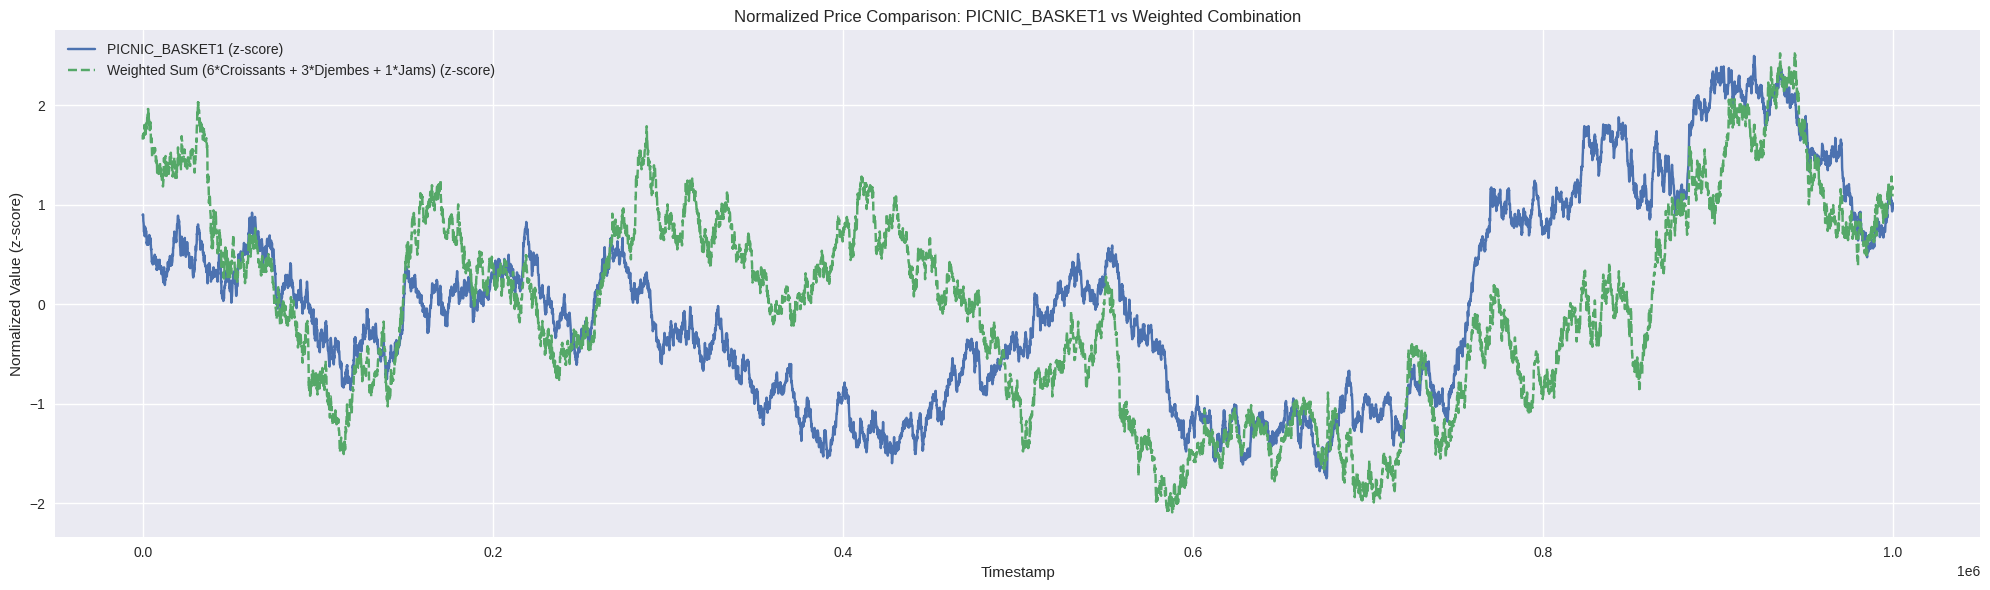

In [76]:
picnic1_df = df_1.loc[df_1['product'] == 'PICNIC_BASKET1'].copy()
croissant_df = df_1.loc[df_1['product'] == 'CROISSANTS'].copy()
djembes_df = df_1.loc[df_1['product'] == 'DJEMBES'].copy()
jams_df = df_1.loc[df_1['product'] == 'JAMS'].copy()

# Select only relevant columns and rename them for clarity
picnic1_df = picnic1_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge the dataframes on 'timestamp'
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')

# Drop any rows with missing data
merged_df = merged_df.dropna()

# Compute the weighted linear combination: 6 * CROISSANTS + 3 * DJEMBES + 1 * JAMS
merged_df['weighted'] = 6 * merged_df['croissant'] + 3 * merged_df['djembes'] + 1 * merged_df['jams']

# --- Normalize using z-score ---
merged_df['picnic1_z'] = (merged_df['picnic1'] - merged_df['picnic1'].mean()) / merged_df['picnic1'].std()
merged_df['weighted_z'] = (merged_df['weighted'] - merged_df['weighted'].mean()) / merged_df['weighted'].std()

# Print a few rows to inspect the normalized values
print(merged_df[['timestamp', 'picnic1_z', 'weighted_z']].head())

# Plot the normalized series on the same graph
plt.figure(figsize=(20, 6))
plt.plot(merged_df['timestamp'], merged_df['picnic1_z'], label='PICNIC_BASKET1 (z-score)', marker='x', linestyle='-')
plt.plot(merged_df['timestamp'], merged_df['weighted_z'], label='Weighted Sum (6*Croissants + 3*Djembes + 1*Jams) (z-score)', marker='x', linestyle='--')
plt.xlabel("Timestamp")
plt.ylabel("Normalized Value (z-score)")
plt.title("Normalized Price Comparison: PICNIC_BASKET1 vs Weighted Combination")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

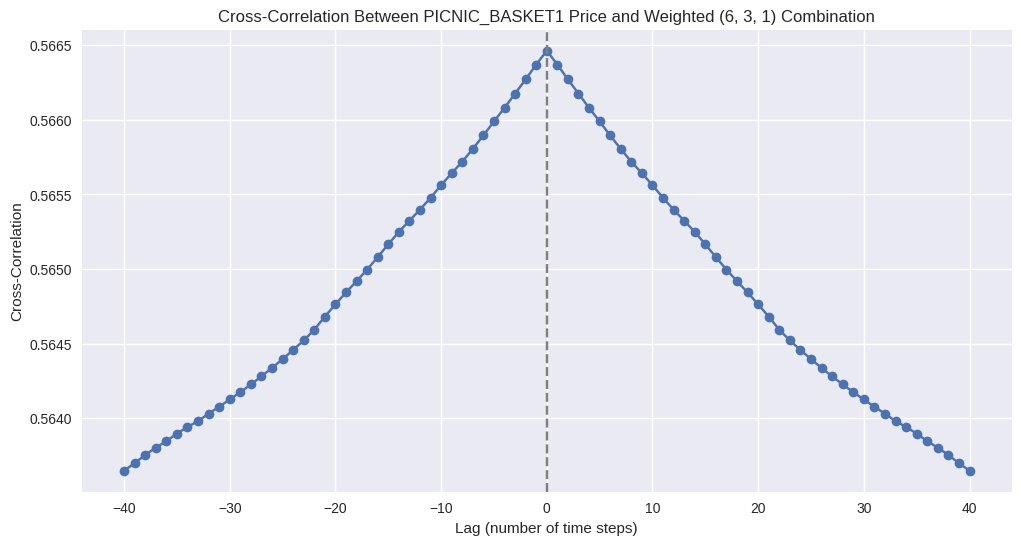

In [62]:
merged_df['weighted'] = 6 * merged_df['croissant'] + 3 * merged_df['djembes'] + 1 * merged_df['jams']

# Drop any NaN rows (if they exist)
merged_df = merged_df.dropna()

# Create a function to calculate cross-correlation at various lags.
def compute_cross_correlation(series1, series2, max_lag):
    lags = np.arange(-max_lag, max_lag+1)
    corr_vals = []
    for lag in lags:
        if lag < 0:
            s1 = series1[:lag]
            s2 = series2[-lag:]
        elif lag > 0:
            s1 = series1[lag:]
            s2 = series2[:-lag]
        else:
            s1 = series1
            s2 = series2
        corr_vals.append(s1.corr(s2))
    return lags, corr_vals

# Choose a maximum lag (in terms of row shifts).
max_lag = 40  # Adjust this based on your data frequency

lags, correlations = compute_cross_correlation(merged_df['picnic1'], merged_df['weighted'], max_lag)

# Plot the cross-correlation function
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations, marker='o')
plt.xlabel("Lag (number of time steps)")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Between PICNIC_BASKET1 Price and Weighted (6, 3, 1) Combination")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

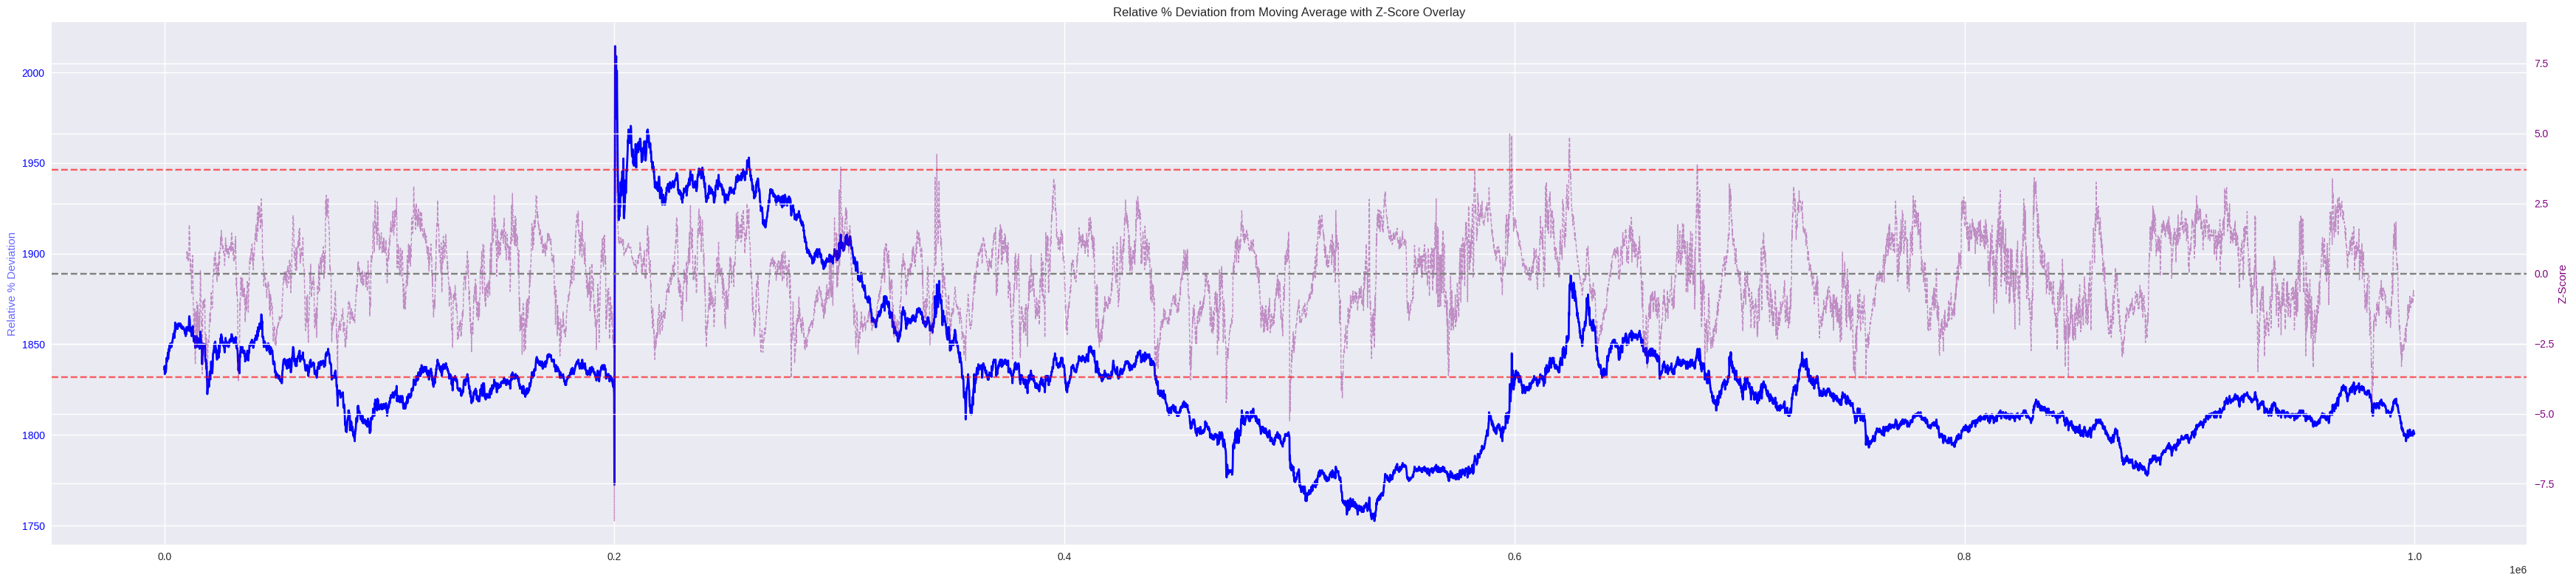

In [79]:
SQUID_INK_df = df_1.loc[df_1['product']=='SQUID_INK'].copy()
window = 100  # rolling window

# === Compute mid price, moving average, std, and percentage deviation ===
SQUID_INK_df['mid_price'] = (SQUID_INK_df['ask_price_1'] + SQUID_INK_df['bid_price_1']) / 2
SQUID_INK_df['ma'] = SQUID_INK_df['mid_price'].rolling(window).mean()
SQUID_INK_df['std'] = SQUID_INK_df['mid_price'].rolling(window).std()
SQUID_INK_df['z_score'] = (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['std']
SQUID_INK_df['relative_diff'] = 100 * (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['ma']

# === Plot: Relative % Deviation and Z-score ===
fig, ax1 = plt.subplots(figsize=(35, 8))

# Z-score (background)
ax2 = ax1.twinx()
ax2.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['z_score'], label='Z-Score',
         color='purple', linestyle='--', linewidth=1, alpha=0.4, zorder=1)
ax2.axhline(0, linestyle='--', color='gray', zorder=1)
ax2.axhline(3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.axhline(-3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.set_ylabel("Z-Score", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Relative % deviation (foreground)
ax1.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['mid_price'],
         label='Relative % Difference from MA', color='blue', linewidth=2, zorder=2)
ax1.set_ylabel("Relative % Deviation", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Relative % Deviation from Moving Average with Z-Score Overlay")
fig.tight_layout()
plt.grid(True)
plt.show()